# 005. Advanced Pandas

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("data/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### DataFrame 을 csv file 로 write

In [9]:
df2 = df.loc[:, ['quality', 'alcohol', 'pH']]
df2.to_csv('data/winequality-2.csv')

In [10]:
pd.read_csv('data/winequality-2.csv', index_col=0).head()

,quality,alcohol,pH
0,5,9.4,3.51
1,5,9.8,3.20
2,5,9.8,3.26
3,6,9.8,3.16
4,5,9.4,3.51


### df.apply + lambda 
- 특정 column 에 함수의 반환값 저장

In [11]:
df["New_val"] = df.apply(lambda x : x["fixed acidity"] + x["citric acid"] , axis = 1 )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.80
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.84
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.76
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40


### lambda 보다 더 복잡한 함수 적용

In [13]:
def custom(alcohol , ph) :
    if alcohol < 10 :
        return ph * 1.5
    else :
        return ph * -1

df["New_pH"] = df.apply(lambda x : custom(x["alcohol"], x["pH"]) , axis = 1 )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val,New_pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40,5.265
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.80,4.800
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.84,4.890
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.76,4.740
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40,5.265


## Indexing of DataFrame

In [42]:
df = pd.read_csv("data/olympics.csv", index_col=0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### column 명 변경
- column 명을 friendly 하게 변경

In [43]:
import re

columns = [re.sub('№', '#', col) for col in df. columns]
columns = [re.sub('[! ]', '', col) for col in columns]
columns = [re.sub('01', 'Gold', col) for col in columns]
columns = [re.sub('02', 'Silver', col) for col in columns]
columns = [re.sub('03', 'Bronze', col) for col in columns]
print(columns)

['#Summer', 'Gold', 'Silver', 'Bronze', 'Total', '#Winter', 'Gold.1', 'Silver.1', 'Bronze.1', 'Total.1', '#Games', 'Gold.2', 'Silver.2', 'Bronze.2', 'Combinedtotal']


In [44]:
df.columns = columns
df.head()

,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### Boolean indexing

- Boolean mask condition 으로 DataFrame을 검색하여 조건에 맞는 row 검색

- where : no value 포함하여 return  

- boolean indexing : no value 제외 return

In [45]:
# 하계올림픽 금메달 1 개 이상 얻은 나라
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
                                                ...  
Independent Olympic Participants (IOP) [IOP]    False
Zambia (ZAM) [ZAM]                              False
Zimbabwe (ZIM) [ZIM]                             True
Mixed team (ZZX) [ZZX]                           True
Totals                                           True
Name: Gold, Length: 147, dtype: bool

- where 를 이용하여 모든 row return

In [46]:
only_gold = df.where(df['Gold'] > 0)

print(only_gold.shape)
only_gold.head()

(147, 15)


,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


- boolean indexing을 이용하여 조건에 맞는 row만 return

In [47]:
only_gold = df[df['Gold'] > 0]

print(only_gold.shape)
only_gold.head()

(100, 15)


,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [48]:
# 하계올림픽 금메달 1 개 이상 또는 동계올림픽 금메달 1 개 이상인 국가의 숫자
len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

101

In [49]:
# 하계올림픽 금메달은 없지만 동계올림픽 금메달 1 개 이상인 국가
df[(df['Gold'] == 0) & (df['Gold.1'] > 0)]

,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


### 복사본 만들기 - 얕은 복사(shallow copy) / 깊은 복사(deep copy)

- 얕은 복사 : 원본과 index/data 공유  
- 깊은 복사 : 별도의 index/data 생성

In [50]:
# deep copy
df2 = df.copy()

In [51]:
# df2의 index를 country column으로 옮기고, 금메달 숫자를 새로운 index 로 설정
df2['country'] = df2.index
df2.set_index('Gold', inplace=True)
df2.sort_index(ascending=False, inplace=True)
df2.head()

,#Summer,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal,country
Gold,,,,,,,,,,,,,,,
4809,27,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Totals
976,26,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,United States (USA) [P] [Q] [R] [Z]
395,9,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Soviet Union (URS) [URS]
236,27,272,272,780,22,10,4,12,26,49,246,276,284,806,Great Britain (GBR) [GBR] [Z]
202,27,223,246,671,22,31,31,47,109,49,233,254,293,780,France (FRA) [O] [P] [Z]


In [52]:
# df 의 index 를 reset
df.reset_index(inplace=True)
df.head()

,index,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## 다중인덱싱 (Multi Index)

- index 가 여러개일 경우 다중 인덱싱이 가능하다.

In [60]:
df = pd.DataFrame(np.random.rand(4, 2),
                 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns=['num1', 'num2'])
df

num1      num2
a 1  0.754467  0.400927
  2  0.715492  0.935624
b 1  0.330828  0.421773
  2  0.879306  0.803072

In [61]:
df.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [84]:
# 특정 multi index 지정 -> series 반환
df.loc[('a', 1)]

num1    0.754467
num2    0.400927
Name: (a, 1), dtype: float64

In [78]:
# 특정 multi index 와 column 지정 -> scalar 반환
df.loc[('a', 1), 'num1']

0.754467202891467

In [85]:
# 여러개의 multi index 와 column 지정 -> DataFrame 반환
df.loc[[('a', 1), ('b', 2)], :]

,,num1,num2
a,1,0.754467,0.400927
b,2,0.879306,0.803072


## multi index practice

- country / state / county level 의 summary 를 구하기 위해 사용  
- STNAME : state 명 
- CTYNAME : county 명  
- SUMLEV 50 은 county level의 합계, 40 은 state level 의 합계

In [97]:
df = pd.read_csv("data/census.csv")
df.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499


In [98]:
# SUMLEV 의 value 분포
df['SUMLEV'].value_counts()

50    3142
40      51
Name: SUMLEV, dtype: int64

- 필요한 column 외에는 삭제

In [99]:
columns_to_keep = ['STNAME', 'CTYNAME',
                   'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 
                   'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015']

In [100]:
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015
0,Alabama,Alabama,14226,59689,59062,57938,58334,58305
1,Alabama,Autauga County,151,636,615,574,623,600
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240
3,Alabama,Barbour County,70,335,300,283,260,269
4,Alabama,Bibb County,44,266,245,259,247,253


In [101]:
df.columns

Index(['STNAME', 'CTYNAME', 'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012',
       'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015'],
      dtype='object')

- (state 명, county 명)으로 multi index 생성

In [102]:
df.set_index(['STNAME', 'CTYNAME'], inplace=True)
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Alabama              14226       59689       59062       57938   
        Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   

                        BIRTHS2014  BIRTHS2015  
STNAME  CTYNAME                                 
Alabama Alabama              58334       58305  
        Autauga County         623         600  
        Baldwin County        2186        2240  
        Barbour County         260         269  
        Bibb County            247         253

In [103]:
df.index

MultiIndex([('Alabama',           'Alabama'),
            ('Alabama',    'Autauga County'),
            ('Alabama',    'Baldwin County'),
            ('Alabama',    'Barbour County'),
            ('Alabama',       'Bibb County'),
            ('Alabama',     'Blount County'),
            ('Alabama',    'Bullock County'),
            ('Alabama',     'Butler County'),
            ('Alabama',    'Calhoun County'),
            ('Alabama',   'Chambers County'),
            ...
            ('Wyoming',   'Niobrara County'),
            ('Wyoming',       'Park County'),
            ('Wyoming',     'Platte County'),
            ('Wyoming',   'Sheridan County'),
            ('Wyoming',   'Sublette County'),
            ('Wyoming', 'Sweetwater County'),
            ('Wyoming',      'Teton County'),
            ('Wyoming',      'Uinta County'),
            ('Wyoming',   'Washakie County'),
            ('Wyoming',     'Weston County')],
           names=['STNAME', 'CTYNAME'], length=3193)

In [104]:
# New York 주의 county list
print(set([county for state, county in df.index.values if state == 'New York']))

{'Delaware County', 'Monroe County', 'Franklin County', 'Orange County', 'Madison County', 'Sullivan County', 'Herkimer County', 'Allegany County', 'Cattaraugus County', 'Saratoga County', 'Albany County', 'Erie County', 'Greene County', 'Onondaga County', 'Broome County', 'Clinton County', 'Oswego County', 'Queens County', 'Hamilton County', 'Montgomery County', 'Kings County', 'Yates County', 'New York County', 'Chautauqua County', 'Fulton County', 'Genesee County', 'Jefferson County', 'Washington County', 'Lewis County', 'Westchester County', 'Wyoming County', 'Putnam County', 'Rockland County', 'Suffolk County', 'Bronx County', 'Cortland County', 'Warren County', 'Seneca County', 'Cayuga County', 'Ulster County', 'Chemung County', 'Columbia County', 'Nassau County', 'Wayne County', 'Orleans County', 'Schoharie County', 'Dutchess County', 'Ontario County', 'Richmond County', 'Essex County', 'Steuben County', 'Otsego County', 'Livingston County', 'St. Lawrence County', 'Oneida County

- 특정 state, county 만 query

In [105]:
df.loc[[('New York', 'Albany County'), ('New York', 'Delaware County')]]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                           
New York Albany County           785        3092        3124        3195   
         Delaware County         121         468         400         407   

                          BIRTHS2014  BIRTHS2015  
STNAME   CTYNAME                                  
New York Albany County          3108        3100  
         Delaware County         368         366

### apply 
- county 별로 전체 column의 최대, 최소값 계산

In [111]:
# 최대, 최소값을 계산할 column 들
cols = df.columns.tolist()
cols

['BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015']

- 최대/최소값을 series 로 반환하는 경우 

In [112]:
def min_max(row):
    data = row[cols]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [113]:
df.apply(min_max, axis=1)

min    max
STNAME  CTYNAME                        
Alabama Alabama            14226  59689
        Autauga County       151    636
        Baldwin County       517   2240
        Barbour County        70    335
        Bibb County           44    266
...                          ...    ...
Wyoming Sweetwater County    167    657
        Teton County          76    269
        Uinta County          73    324
        Washakie County       26    108
        Weston County         26     93

[3193 rows x 2 columns]

- new column을 반환하는 경우 

In [114]:
def min_max(row):
    data = row[cols]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row

In [115]:
df.apply(min_max, axis=1)

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                             
Alabama Alabama                 14226       59689       59062       57938   
        Autauga County            151         636         615         574   
        Baldwin County            517        2187        2092        2160   
        Barbour County             70         335         300         283   
        Bibb County                44         266         245         259   
...                               ...         ...         ...         ...   
Wyoming Sweetwater County         167         640         595         657   
        Teton County               76         259         230         261   
        Uinta County               73         324         311         316   
        Washakie County            26         108          90          95   
        Weston County              26          81          74          93   

                           BIRTHS2014  BIRTHS2015    max    min  
STNAME  CTYNAME                                                  
Alabama Alabama                 58334       58305  59689  14226  
        Autauga County            623         600    636    151  
        Baldwin County           2186        2240   2240    517  
        Barbour County            260         269    335     70  
        Bibb County               247         253    266     44  
...                               ...         ...    ...    ...  
Wyoming Sweetwater County         629         620    657    167  
        Teton County              249         269    269     76  
        Uinta County              316         316    324     73  
        Washakie County            96          90    108     26  
        Weston County              77          79     93     26  

[3193 rows x 8 columns]

## Column Value Update

In [116]:
df = pd.DataFrame([{"name": "홍길동", "Item": "김치", "Cost": 22.50},
                   {"name": "김철수", "Item": "생선", "Cost": 2.50},
                   {"name": "이영희", "Item": "숫가락", "Cost": 5.00}],
                    index=['Store 1', 'Store 1', 'Store 2'])
df

,name,Item,Cost
Store 1,홍길동,김치,22.5
Store 1,김철수,생선,2.5
Store 2,이영희,숫가락,5.0


- 새로운 column 추가

In [117]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,name,Item,Cost,Date
Store 1,홍길동,김치,22.5,December 1
Store 1,김철수,생선,2.5,January 1
Store 2,이영희,숫가락,5.0,mid-May


- broadcasting

In [118]:
df['Delivered'] = True
df

,name,Item,Cost,Date,Delivered
Store 1,홍길동,김치,22.5,December 1,True
Store 1,김철수,생선,2.5,January 1,True
Store 2,이영희,숫가락,5.0,mid-May,True


- reset index

In [130]:
adf = df.reset_index()
adf

,index,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,December 1,True
1,Store 1,김철수,생선,2.5,January 1,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


In [134]:
adf.rename(columns={'index': 'Store'}, inplace=True)
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,December 1,True
1,Store 1,김철수,생선,2.5,January 1,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


- 특정 column 의 값을 Series를 이용하여 update

In [137]:
# list 이용
adf['Date'] = pd.Series(['January 1', 'mid-May'])
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,January 1,True
1,Store 1,김철수,생선,2.5,mid-May,True
2,Store 2,이영희,숫가락,5.0,NaN,True


In [138]:
# dictionary 이용
adf['Date'] = pd.Series({0: 'January 1', 2: 'mid-May'})
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,January 1,True
1,Store 1,김철수,생선,2.5,NaN,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


# Merging and Concatenating

## Concatenation

- Concatenation 은 DataFrame 들을 단순히 가져다 붙이는 것이다. 
- DataFrame 들의 dimension 이 반드시 같아야 한다.  
- SQL 의 UNION 에 해당  
- 두개 이상의 DataFrame 연결

In [150]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],
                    'C': ['C0', 'C1']},
                    index=[0, 1])

df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3'],
                    'C': ['C2', 'C3']},
                    index=[2, 3]) 

df3 = pd.DataFrame({'A': ['A4', 'A5'],
                    'B': ['B4', 'B5'],
                    'C': ['C4', 'C5']},
                    index=[4, 5])

In [151]:
# default axis=0 이다. 즉, row 를 기준으로 concatenate 한다.
pd.concat([df1, df2, df3])  

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [152]:
# axis = 1 로 지정하면 column 을 기준으로 concatenate 한다.
pd.concat([df1, df2, df3], axis=1)  

,A,B,C,A,B,C,A,B,C
0,A0,B0,C0,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,A2,B2,C2,NaN,NaN,NaN
3,NaN,NaN,NaN,A3,B3,C3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,A4,B4,C4
5,NaN,NaN,NaN,NaN,NaN,NaN,A5,B5,C5


## Merging

- Pandas 의 **merge** mothod는 SQL Table merge 와 유사한 기능을 제공한다.   
- 두개의 DataFrame 을 대상으로 한다.  
- index 를 기준으로 join

### DataFrame 간의 Join

<img src="venDiagram.png" width=400>
<p> Inner Join (Intersection) </p>
<img src="innerJoin.png" width=300>

In [166]:
# 교직원 dataframe
staff_df = pd.DataFrame([{"Name": '홍길동', "Role": '인사부장'},
                         {"Name": "김철수", "Role": '중간간부'},
                         {"Name": "이영희", "Role": "평가자"}])

staff_df = staff_df.set_index("Name")

staff_df

,Role
Name,
홍길동,인사부장
김철수,중간간부
이영희,평가자


In [155]:
# 학생 dataframe
student_df = pd.DataFrame([{"Name": '홍길동', "Major": 'Business'},
                           {"Name": "유재석", "Major": 'AI'},
                           {"Name": "이영희", "Major": "Engineering"}])

student_df = student_df.set_index("Name")
student_df

,Major
Name,
홍길동,Business
유재석,AI
이영희,Engineering


### outer join 

- 두 DataFrame 의 모든 index 포함

In [167]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,Major
Name,,
김철수,중간간부,NaN
유재석,NaN,AI
이영희,평가자,Engineering
홍길동,인사부장,Business


### inner join (default)
- intersection (교집합)  
- 두 DataFrame 에 공통적으로 존재하는 index 기준

In [169]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,Major
Name,,
홍길동,인사부장,Business
이영희,평가자,Engineering


### left join $\rightarrow$ SQL 의 left outer join 과 유사 
- left DataFrame 은 모두 포함되고 right DataFrame 은 공통 index 만 포함

In [170]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,Major
Name,,
홍길동,인사부장,Business
김철수,중간간부,NaN
이영희,평가자,Engineering


### right join $\rightarrow$ SQL 의 right outer join 과 유사 

- right DataFrame 은 모두 포함되고 left DataFrame 은 공통 index 만 포함

In [22]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,Major
Name,,
홍길동,인사부장,Business
유재석,NaN,AI
이영희,평가자,Engineering


### index 가 단순 sequence 일 경우 join 에 사용할 column 지정

In [171]:
staff_df = staff_df.reset_index()
staff_df

,Name,Role
0,홍길동,인사부장
1,김철수,중간간부
2,이영희,평가자


In [172]:
student_df = student_df.reset_index()
student_df

,Name,Major
0,홍길동,Business
1,유재석,AI
2,이영희,Engineering


In [173]:
# merge 할 기준 column 지정
pd.merge(staff_df, student_df, left_on='Name', right_on='Name')

,Name,Role,Major
0,홍길동,인사부장,Business
1,이영희,평가자,Engineering


### 중복된 column 명이 있을 경우 자동으로 suffix 부여

In [174]:
staff_df['Location'] = ['Korea', 'China', 'Europe']
staff_df

,Name,Role,Location
0,홍길동,인사부장,Korea
1,김철수,중간간부,China
2,이영희,평가자,Europe


In [175]:
student_df['Location'] = ['Seoul', 'Pusan', 'Jeju']
student_df

,Name,Major,Location
0,홍길동,Business,Seoul
1,유재석,AI,Pusan
2,이영희,Engineering,Jeju


### left : `_x`, right: `_y`

In [176]:
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,Major,Location_y
0,홍길동,인사부장,Korea,Business,Seoul
1,김철수,중간간부,China,NaN,NaN
2,이영희,평가자,Europe,Engineering,Jeju


## 연습 문제 

- 다음과 같은 두개의 DataFrame 을 생성하고 하나의 DataFrame 으로 join

### product DataFrame

| productID | Price | Product | 
|:---:|:---:|:---:|
| 4109| 5.0 | Sushi Roll | 
| 1412 | 0.5 | Egg |
| 8931 | 1.5 | Bagel |

### invoice DataFrame
<table>
    <th></th>
    <th>Customer</th>
    <th>ProductId</th>
    <th>Quantity</th>
    <tr>
    <td>0</td>
     <td>ALL</td>
     <td>4109</td>
     <td>1</td>
    </tr>
    <tr>
    <td>1</td>
    <td>Eric</td>
     <td>1412</td>
     <td>12</td>
     </tr>
    <tr>
     <td>2</td>
    <td>Ande</td>
     <td>8931</td>
     <td>6</td>
     </tr>
    <tr>
    <td>3</td>
    <td>Sam</td>
    <td>4109</td>   
    <td>2</td>
    </tr>
</table>

In [ ]:
answer_df = pd.merge(# Code Here )

```
  Customer  ProductID  Quantity  Price     Product
0      Ali          4109         1          5.0    Sushi Roll
3      Sam       4109         2          5.0    Sushi Roll
1     Eric         1412        12         0.5         Egg
2     Ande       8931         6          1.5       Bagel
```

## method chaining

- readability를 향상 시키는 코딩 관습

In [177]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- without method chaining

In [178]:
tmp = df.where(df['quality'] == 3)
tmp = tmp.dropna()
tmp = tmp.reset_index()
tmp = tmp.rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
tmp = tmp.loc[:, ['acid', 'target']]
tmp.head()

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0


- with method chaining 

- python은 `()`를 이용하면 여러 line 에 걸쳐 coding 가능

In [179]:
(df.where(df['quality'] == 3)
    .dropna()
    .reset_index()
    .rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
    .loc[:, ['acid', 'target']]).head()

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0


### groupby 를 사용하지 않고 wine quaility 별 평균 fixed acidity 구하기

In [182]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [181]:
for quality in sorted(df['quality'].unique()):
    avg = np.mean(df.where(df['quality'] == quality).dropna()['fixed acidity'])
    print(f"quality {quality} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


###  group by 를 사용하여 wine quaility 별 평균 fixed acidity 구하기
- without aggregate function

In [183]:
for group, frame in df.groupby('quality'):
    print(group)
    print(frame.shape)

3
(10, 12)
4
(53, 12)
5
(681, 12)
6
(638, 12)
7
(199, 12)
8
(18, 12)


In [184]:
for group, frame in df.groupby('quality'):
    avg = np.mean(frame['fixed acidity'])
    print(f"quality {group} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


### groupby + aggregate method 사용
- agg : alias of aggretate

In [185]:
df.groupby('quality').agg({'fixed acidity': np.mean})

,fixed acidity
quality,
3,8.360000
4,7.779245
5,8.167254
6,8.347179
7,8.872362
8,8.566667


## Scales (척도)

- 명목 척도 (nominal scale): 말 그대로 이름뿐인 척도. Categorical data. 순서 없음. (예. 남성, 여성, 동물 종류)

- 순위 척도(ordinal scale) : 말 그대로 순위를 나타내는 척도 (예. 성적) 

- 등간 척도(interval scale): 척도간의 간격이 일정. 0이 아무런 기준을 갖지 않음.(예. 온도)   

- 비율 척도 (ratio scale): 절대 영점이 있는 등간 척도. 0이 절대적인 기준이 되며 두 척도 사이에 비율이 존재. 우리가 사용하는 대부분의 척도 
(예. 거리, 무게, 시간 등). 일반 numeric variable.

### Pandas 로 명목 척도 (Nominal Scale) 표현

- Dummy Variables for Nominal
- pd.get_dummies() method 사용

In [225]:
series = pd.Series([0, 1, 1, 2, 1, 0, 0, 2, 2, 1])
mapper = {0: 'New York', 1: 'London', 2: 'Zurich'}
nomvar = series.replace(mapper)
nomvar

0    New York
1      London
2      London
3      Zurich
4      London
5    New York
6    New York
7      Zurich
8      Zurich
9      London
dtype: object

In [226]:
pd.get_dummies(nomvar)

,London,New York,Zurich
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,0,0,1
9,1,0,0


### Pandas로 순서가 있는 Category 변수 (순위 척도) 표현

- data type 변환 방법 

    - Grades column 을 순서가 있는 category column 으로 변환. 
    - number 로 encoding 않아도 data 자체에서 category 의 순서를 기억하도록 Pandas 가 지원
    - pd.factorize method를 이용하여 integer 변환

In [266]:
df = pd.DataFrame({'Name': ['영수', '철수', '영희', '길동', '희수', '영주'],
                   'Grades': ['D', 'C', 'A', 'B', 'A', 'D']})
df

,Name,Grades
0,영수,D
1,철수,C
2,영희,A
3,길동,B
4,희수,A
5,영주,D


- 순위 변수의 dtype 을 category 로 변환

In [267]:
df['Grades'] = pd.Categorical(df['Grades'], 
                    categories=['D', 'C', 'B', 'A'], 
                    ordered=True)
df.Grades

0    D
1    C
2    A
3    B
4    A
5    D
Name: Grades, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [270]:
df.Grades > 'C'

0    False
1    False
2     True
3     True
4     True
5    False
Name: Grades, dtype: bool

In [271]:
pd.factorize(df.Grades)[0]

array([0, 1, 2, 3, 2, 0])

In [272]:
df['Grades_'] = pd.Series(pd.factorize(df.Grades)[0])
df

,Name,Grades,Grades_
0,영수,D,0
1,철수,C,1
2,영희,A,2
3,길동,B,3
4,희수,A,2
5,영주,D,0


### 등간척도 (interval scale) 표현 --> binning
- 연속된 숫자를 구간화 (등간 척도)

- pandas 는 `cut` method로 binning 지원

In [275]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 160, 182, 177, 180, 171])

#### 3 구간으로 구분

In [276]:
# 단순 구분
pd.cut(s, 3)

0     (159.97, 170.0]
1      (170.0, 180.0]
2      (170.0, 180.0]
3      (180.0, 190.0]
4     (159.97, 170.0]
5      (180.0, 190.0]
6      (170.0, 180.0]
7      (180.0, 190.0]
8      (170.0, 180.0]
9     (159.97, 170.0]
10     (180.0, 190.0]
11     (170.0, 180.0]
12     (170.0, 180.0]
13     (170.0, 180.0]
dtype: category
Categories (3, interval[float64]): [(159.97, 170.0] < (170.0, 180.0] < (180.0, 190.0]]

In [286]:
# 구간명 부여
s1 = pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])
s1

0      Small
1     Medium
2     Medium
3      Large
4      Small
5      Large
6     Medium
7      Large
8     Medium
9      Small
10     Large
11    Medium
12    Medium
13    Medium
dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [287]:
s1.cat.categories

Index(['Small', 'Medium', 'Large'], dtype='object')

In [288]:
pd.factorize(s1)[0]

array([0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1])

In [289]:
s1.cat.remove_categories('Small')

0        NaN
1     Medium
2     Medium
3      Large
4        NaN
5      Large
6     Medium
7      Large
8     Medium
9        NaN
10     Large
11    Medium
12    Medium
13    Medium
dtype: category
Categories (2, object): ['Medium' < 'Large']

In [290]:
s1 = s1.cat.add_categories(['A', 'B'])
s1

0      Small
1     Medium
2     Medium
3      Large
4      Small
5      Large
6     Medium
7      Large
8     Medium
9      Small
10     Large
11    Medium
12    Medium
13    Medium
dtype: category
Categories (5, object): ['Small' < 'Medium' < 'Large' < 'A' < 'B']

In [291]:
s1.cat.reorder_categories(['A', 'B', 'Small', 'Medium', 'Large'])

0      Small
1     Medium
2     Medium
3      Large
4      Small
5      Large
6     Medium
7      Large
8     Medium
9      Small
10     Large
11    Medium
12    Medium
13    Medium
dtype: category
Categories (5, object): ['A' < 'B' < 'Small' < 'Medium' < 'Large']

### category 변수 연습 

In [292]:
df = pd.read_csv("data/winequality-red.csv", sep=";")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [293]:
df['quality'].head(2)

0    5
1    5
Name: quality, dtype: int64

In [294]:
# quality 를 category 변수로 변환
df['quality'] = df['quality'].astype('category')
df['quality'].head(2)

0    5
1    5
Name: quality, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [295]:
# fixed acidity 를 구간화
df['fixed acidity'] = pd.cut(df['fixed acidity'], 3, labels=['high', 'medium', 'low'])
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,high,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,high,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [296]:
df['fixed acidity'].cat.categories

Index(['high', 'medium', 'low'], dtype='object')

## Pivot Tabels

- 여러 데이터 중에서 자신이 원하는 데이터만을 가지고 원하는 행과 열에 데이터를 배치하여 새로운 보고서를 만드는 기능  

- SQL 의 query 기능과 유사

In [297]:
df = pd.read_csv("data/cars.csv")
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


### pivot table 작성 1
- 전기차 연비 data 에서 연도, 제작사 (`YEAR`, `Make`) 별로 평균 배터리용량 `(kw)` 을 보여주는 pivot table 생성  

- 연도를 index 로 하고, 제작사를 column 에 배치 

- pivot table 의 value 는 해당연도 제작사 배터리 용량의 평균값 표시

In [298]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


### pivot table 작성 2

- 위와 동일한 방법으로 평균과 최소량을 동시에 보여주는 pivot table 생성

In [299]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min])

mean                                                              amin  \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA    BMW   
YEAR                                                                            
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN    NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000    NaN   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333    NaN   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667  125.0   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000  125.0   

                                                            
Make CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA  
YEAR                                                        
2012       NaN    NaN   NaN       49.0   80.0   NaN    NaN  
2013       NaN  107.0   NaN       49.0   80.0  35.0  270.0  
2014     104.0  107.0   NaN       49.0   80.0  35.0  225.0  
2015     104.0  107.0  81.0       49.0   80.0  35.0  280.0  
2016     104.0  107.0  81.0       49.0   80.0  35.0  283.0

- aggfunc 별 subtotal 추가  

- margin = True

In [300]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

## 연습 문제

- 위의 cars.csv 파일의 column 명이 너무 길므로 column 명 중 `(kW)` 를 `kw` 로,  `CITY (kWh/100 km)` 을 `city-km` 으로 변경  

- groupby 함수를 사용하여,  연도별 평균 배터리 용량(`kw`) 표시 (`Make` 무시)  

- 연도, 제작사별로 평균 `city-km`을 보여주는 pivot table 작성 

In [ ]:
# column 명 변경
df = df.rename(%code here%)
df.head()

In [ ]:
# groupby code here

In [ ]:
# 연도별 평균 배터리 용량 code here

# Date data 처리 기능

### Timestamp

- Python 의 datetime 과 대부분의 경우 호환  

- DatetimeIndex 로 사용

In [301]:
pd.Timestamp('10/12/2021 10:30PM')

Timestamp('2021-10-12 22:30:00')

In [302]:
pd.Timestamp('2021-10-12 10:30PM')

Timestamp('2021-10-12 22:30:00')

In [303]:
import datetime

datetime.datetime(2020, 10, 12, 22, 30)

datetime.datetime(2020, 10, 12, 22, 30)

### DatetimeIndex

In [304]:
ts1 = pd.Series(list('abc'), 
                   index=[pd.Timestamp('2020-09-01'), 
                          pd.Timestamp('2020-09-02'), 
                          pd.Timestamp('2020-09-03')])
ts1

2020-09-01    a
2020-09-02    b
2020-09-03    c
dtype: object

In [305]:
type(ts1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Datetime format 으로 convert

- 다양한 현태의 날자 표현을 모두 `pd.to_datetime` method를 이용하여 DatetimeIndex로 변환

In [306]:
d1 = ['2 June 2013', 'Aug 29, 2020', '2018-06-30', '7/12/2017']

ts2 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), index=d1, columns=list('ab'))
ts2

,a,b
2 June 2013,84,41
"Aug 29, 2020",21,96
2018-06-30,30,86
7/12/2017,49,16


In [307]:
ts2.index = pd.to_datetime(ts2.index)
ts2

,a,b
2013-06-02,84,41
2020-08-29,21,96
2018-06-30,30,86
2017-07-12,49,16


<AxesSubplot:>

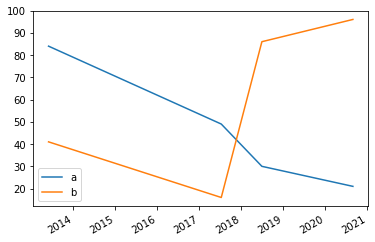

In [308]:
ts2.plot()

### Timedelta

- difference of time

In [309]:
pd.Timestamp('2020-10-02') - pd.Timestamp('2020-09-30')

Timedelta('2 days 00:00:00')

In [310]:
pd.Timestamp('2020-10-02 8:10AM') + pd.Timedelta('30d 10h')

Timestamp('2020-11-01 18:10:00')